## Statistical Methods in Python For Rare Event Searches

*Summer Course at Canfranc Underground Laboratory (LSC) July 2019*

### Lecture II - Exercises

## Hypothesis testing - simple case 

*Author: Jose A. Hernando*, June 2019

*Instituto Galego de Altas Enerxías. Universidade de Santiago de Compostela, Spain.*

In [5]:
import time
print( ' Last Execution ', time.asctime())

 Last Execution  Wed Jul 10 13:19:14 2019


In [6]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

import httoys    as httoys
import htcore    as htcore
import htcatalog as htcata
import htplot    as htplot

plt.style.context('seaborn-colorblind');

**Exercise** Consider now NEXT experiment as a counting experiment. Compute now the number of possible $\beta\beta0\nu$ events in 100 kg of Xenon if the half-lifetime is $10^{-25}$ y. Compute also the number of expected background events, if the background index is $4 \times 10^{-4}$ counts/(keV kg y) and with 1% energy resolution at $Q_{\beta\beta} = 3.458$ keV. Obtain the pdfs of the test statistics. Consider that the signal is gaussian distributed and take 3 sigmas as Region of Interest (RoI). 

**Explore**: Modify now the background index, the resolution, the Xe mass and the half-lifetime.

The number of expected signal events are:

$$
n_s = \log(2)  \epsilon \, a \frac{N_A}{A} M \frac{t}{ T_{1/2}}
$$

where $N_A$ is the Avogadro number, $A$ the atomic number, $M$ the mass and $T_{1/2}$ the half-life time.

and the number of background events:

$$
n_b = B  \Delta E  M * t
$$

where $B$ is the background index in counts/(keV kg y), $\Delta E$ is the energy FWHM.

In [47]:
NA = 6.022140e23
Qbb = 2457.83
eff, bi, fwhm, mass, time = .32, 4.22e-4, 0.01*Qbb, 100., 5
T = 1.e26

def nsig(time, mass, T, eff, abbundance = 0.9, A = 136.):
    mu = 1000.* np.log(2.)* (NA/A) * eff * abbundance * mass * time / T
    return mu

def nbkg(time, mass, bi, fwhm):
    return bi * fwhm * time * mass

In [39]:
size = 10000
ss = nsig(time, mass, T , eff)
bs = nbkg(time, mass, bi, fwhm)
print('signal ', ns)
print('bkg    ', bs)
h0, h1 = stats.poisson(bs), stats.poisson(bs + ss)
# test of simple hypothesis - generate events and compute test-statistic
ht  = htcore.htsimple(h0, h1, size)

signal  4.4197722655806375
bkg     5.186021299999999


q0  -2.6755483457817757
observed data : 5
H0 p-value    : 0.5992
H1 p-value    : 0.0846
CLs           : 0.14656964656964655


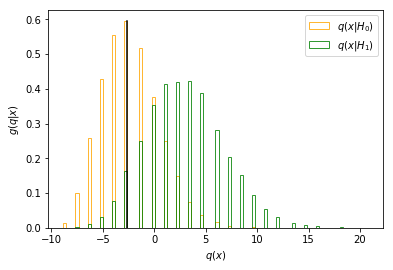

In [46]:
# plot test-statistic distribution (plot x0 if provided as argument)
htplot.plt_htsimple(ht, x0 = int(bs), nbins = 100);

**Exercise**: Consider a counting experiment with four independent bins. The background for $H_0$ is poisson distributed in each bin with ${\bf b} = (2, 1.5, 1, 0.5)$ and $H_1$ a signal, is also poisson distributed on top of the background ${\bf b} + {\bf s}$ with ${\bf s} = (1, 2, 2, 1)$. Obtain the pdfs of the test-statistics $g(q|H_0), \; g(q |H_1)$.

We procedure int he same mammer, simulate many experiments and obtain the pdfs of the test-statistics, $g(q|H_0), \, g(q|H_0)$.

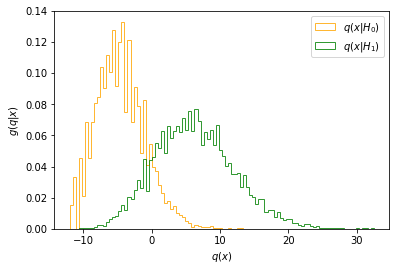

In [7]:
b, s, size = np.array([2., 1.5, 1., 0.5]), np.array([1., 2., 2., 1.]), 10000
# generators of n-poisson for b and b+s
h0, h1 = htcata.poisson_ncounter(b), htcata.poisson_ncounter(b + s)
# test of simple hypothesis - generate events and compute test-statistic
ht  = htcore.htsimple(h0, h1, size)
# plot test-statistic distribution (plot x0 if provided as argument)
htplot.plt_htsimple(ht, nbins = 100);
#plt_test_stats(ht.q0s, ht.q1s, range = ht.qrange())

**Exercise**: Consider the expected bacground events and signal events in bins of energy in the RoI of the KamLAND-Zen experiment in Fig 2-b) [PRL-117](https://arxiv.org/abs/1605.02889). And compute now the pdfs of $q$ for only background and 10 times the signal.

In [8]:
# second period
bs =     np.array([4.0, 2.0, 1.5, 1.0, 0.8, 0.7, 0.6, 0.5, 0.4])
ss =  1.*np.array([0.2, 0.4, 0.5, 0.5, 0.5, 0.4, 0.2, 0.1, 0.0])
ns =     np.array([4.0, 0.0, 2.0, 4.0, 0.0, 0.0, 0.0, 1.0, 0.0])
h0, h1 = htcata.poisson_ncounter(bs), htcata.poisson_ncounter(bs + ss)
size = 10000
ht  = htcore.htsimple(h0, h1, size)

q0  -0.4505864183841979
observed data : [4. 0. 2. 4. 0. 0. 0. 1. 0.]
H0 p-value    : 0.3789
H1 p-value    : 0.258
CLs           : 0.41539204636934474


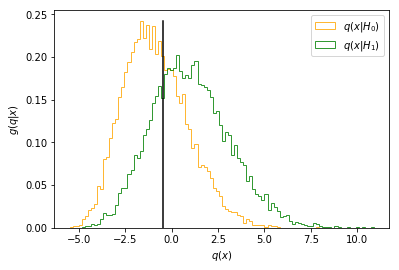

In [9]:
htplot.plt_htsimple(ht, x0 = ns, nbins = 100);

In [10]:
# first period
bs1 =     np.array([4.8, 2.8, 2.5, 2.0, 2.0, 2.1, 2.2, 2.0, 2.0])
ss1 =  1.*np.array([0.4, 0.6, 0.7, 0.8, 0.7, 0.4, 0.3, 0.1, 0.0])
ns1 =     np.array([6.0, 3.0, 2.0, 2.0, 1.0, 1.0, 2.0, 4.0, 1.0])
h0, h1 = htcata.poisson_ncounter(bs1), htcata.poisson_ncounter(bs1 + ss1)
size = 10000
ht  = htcore.htsimple(h0, h1, size)

q0  -1.6906514044756413
observed data : [6. 3. 2. 2. 1. 1. 2. 4. 1.]
H0 p-value    : 0.67
H1 p-value    : 0.0902
CLs           : 0.2733333333333333


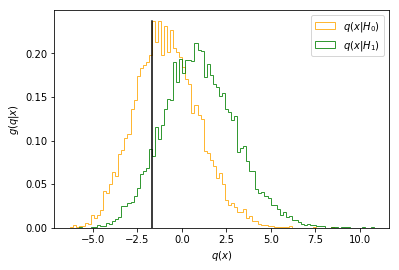

In [11]:
htplot.plt_htsimple(ht, x0 = ns1, nbins = 100);

In [12]:
# Period 1 & Period 2
bs = np.array(list(bs) + list(bs1))
ss = np.array(list(ss) + list(ss1))
ns = np.array(list(ns) + list(ns1))
h0, h1 = htcata.poisson_ncounter(bs), htcata.poisson_ncounter(bs + ss)
size = 10000
ht  = htcore.htsimple(h0, h1, size)

q0  -2.1412378228598357
observed data : [4. 0. 2. 4. 0. 0. 0. 1. 0. 6. 3. 2. 2. 1. 1. 2. 4. 1.]
H0 p-value    : 0.5403
H1 p-value    : 0.0759
CLs           : 0.16510767892103545


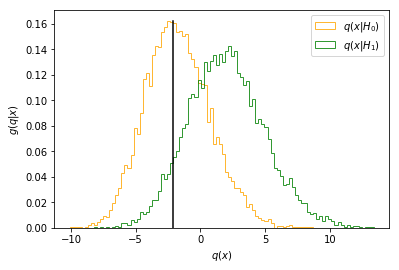

In [13]:
htplot.plt_htsimple(ht, x0 = ns, nbins = 100);

----

We call the RoC curve the efficiency (power, $1 - \beta$) vs rejection (1-$\alpha$) of the background. This is usually the plot that shows the discrimination power of the test-statistics. 

As mentioned before the cut $k$ to classify an event as $H_0$ or $H_1$ depends on the case. It is not the same to identify the tag of a jet than to identify the Higgs boson.

**Exercise**: In the previous case, compute the RoC curve, the $H_1$ efficiency vs $H_0$ rejection.

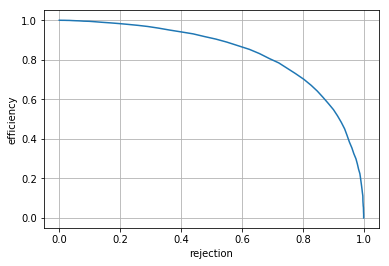

In [14]:
qrange = np.linspace(*ht.qrange(), 100)
rej = [1. - ht.p0value(qi) for qi in qrange]
eff = [1. - ht.p1value(qi) for qi in qrange]
plt.plot(rej, eff); plt.grid(True);
plt.xlabel('rejection'); plt.ylabel('efficiency');

**Exercise:** An experiment expects $(2, 1)$ background events in two bins, and a possible signal $(8, 9)$ on top. It observes $(9, 9)$, can claim observation?

**Exercise:** In the case it observes $(1, 1)$, can reject the signal at 95 % CL?

**Exercise:** Consider an experiment with several independent channels that expects as background ${\bf b} = (2, 1.5, 1, 0.5) $ and as signal ${\bf s} = (1, 3, 3, 1)$. It finally measures $(2, 1, 1, 0)$. Compute the p-value of $H_1$. 

**Exercise:** Consider the above case of KamLAND-Zen, compute the p-value of $H_0$!

----

**Exercise:** Consider the case of an experiment that expects $b=2 \pm 0.2$ background events, and search for a signal $s=5$. What is the effect of the uncertainty on $b$ in the expected 95% CL limit?